# Question 1

In [1]:
import numpy as np
import pandas as pd

In [2]:
users = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user",sep='|')
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


### Mean age per occupation

In [3]:
mean_age = users.groupby('occupation').mean()
mean_age['age']

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

### Male ratio per occupation

In [4]:
male_emp = users[users['gender'] == 'M']
male_group = male_emp.groupby(['occupation','gender'])['occupation'].count()
total_emp =users.groupby('occupation')['gender'].count()
male_ratio = male_group/total_emp
male_ratio = male_ratio.sort_values(ascending=False)
male_ratio

occupation     gender
doctor         M         1.000000
engineer       M         0.970149
technician     M         0.962963
retired        M         0.928571
programmer     M         0.909091
executive      M         0.906250
scientist      M         0.903226
entertainment  M         0.888889
lawyer         M         0.833333
salesman       M         0.750000
educator       M         0.726316
student        M         0.693878
other          M         0.657143
marketing      M         0.615385
writer         M         0.577778
none           M         0.555556
administrator  M         0.544304
artist         M         0.535714
librarian      M         0.431373
healthcare     M         0.312500
homemaker      M         0.142857
dtype: float64

### Minimum and maximum age per occupation

In [5]:
max_age = users.groupby('occupation')['age'].max()
min_age = users.groupby('occupation')['age'].min()
data = pd.concat([max_age,min_age],axis=1)
data.columns = ['max_age', 'min_age']
data

,max_age,min_age
occupation,,
administrator,70,21
artist,48,19
doctor,64,28
educator,63,23
engineer,70,22
entertainment,50,15
executive,69,22
healthcare,62,22
homemaker,50,20


### Mean age for combination of occupation and gender

In [6]:
mean_age = users.groupby(['occupation','gender'])['age'].mean()
mean_age

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

### Percentage of men and women

In [7]:
emp_count = users.groupby(['occupation','gender'])['occupation'].count()
total_emp = users.groupby('occupation')['gender'].count()
emp_gender_pct = (emp_count/total_emp)*100
emp_gender_pct

occupation     gender
administrator  F          45.569620
               M          54.430380
artist         F          46.428571
               M          53.571429
doctor         M         100.000000
educator       F          27.368421
               M          72.631579
engineer       F           2.985075
               M          97.014925
entertainment  F          11.111111
               M          88.888889
executive      F           9.375000
               M          90.625000
healthcare     F          68.750000
               M          31.250000
homemaker      F          85.714286
               M          14.285714
lawyer         F          16.666667
               M          83.333333
librarian      F          56.862745
               M          43.137255
marketing      F          38.461538
               M          61.538462
none           F          44.444444
               M          55.555556
other          F          34.285714
               M          65.714286
progra

# Question 2

In [8]:
import pandas as pd
import numpy as np

In [9]:
euro12 = pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv")

### Selecting only the goals column

In [10]:
euro12['Goals']

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

### Number of participating teams 

In [11]:
euro12['Team'].count()

16

### Number of columns in the dataset

In [12]:
euro12.shape[1]

35

### View only the columns Team, Yellow Cards and Red Cards in dataframe discipline

In [13]:
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


### Sorting by red cards then by yellow cards

In [14]:
discipline = discipline.sort_values(by=['Red Cards', 'Yellow Cards'])
discipline

,Team,Yellow Cards,Red Cards
2,Denmark,4,0
5,Germany,4,0
3,England,5,0
8,Netherlands,5,0
15,Ukraine,5,0
4,France,6,0
12,Russia,6,0
1,Czech Republic,7,0
14,Sweden,7,0
0,Croatia,9,0


### Mean yellow cards given per team

In [15]:
euro12['Yellow Cards'].mean()

7.4375

### Teams with more than 6 goals

In [16]:
teams = euro12[euro12.Goals>6]
teams['Team']

5     Germany
13      Spain
Name: Team, dtype: object

### Team names staring with G 

In [17]:
G_teams = euro12[euro12.Team.str.startswith('G')]
G_teams['Team']

5    Germany
6     Greece
Name: Team, dtype: object

### Selecting the first 7 columns

In [18]:
euro12.iloc[:, :7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


### Selecting every column except the last 3

In [19]:
euro12.iloc[:, :-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


### Shooting accuracy from England, Italy and Russia

In [20]:
shoot_acc = euro12[(euro12.Team == "England") | (euro12.Team == "Italy") | (euro12.Team == "Russia")]
shoot_acc[['Team', 'Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


# Question 3

In [21]:
import pandas as pd
import numpy as np
import random

### Creating 3 random series

In [22]:
s1 = pd.Series(random.randint(1,4) for _ in range(100))
s2 = pd.Series(random.randint(1,2) for _ in range(100))
s3 = pd.Series(random.randint(10000,30000) for _ in range(100))

### Creating a dataframe by joining the 3 series by column

In [23]:
df1 = pd.concat([s1, s2, s3], axis = 1)
df1

,0,1,2
0,2,2,13060
1,3,2,16500
2,4,1,19930
3,1,2,18200
4,3,2,29053
...,...,...,...
95,1,2,12952
96,2,2,22910
97,4,2,16330
98,2,2,19039


### Changing the columns name to bedrs, bathrs, price_sqr_meter

In [24]:
df1.columns = ["bedrs", "bathrs", "price_sqr_meter"]
df1

,bedrs,bathrs,price_sqr_meter
0,2,2,13060
1,3,2,16500
2,4,1,19930
3,1,2,18200
4,3,2,29053
...,...,...,...
95,1,2,12952
96,2,2,22910
97,4,2,16330
98,2,2,19039


### One column dataframe with the values of 3 series name bigcolumn

In [25]:
bigcolumn = pd.concat([s1, s2, s3])
bigcolumn

0         2
1         3
2         4
3         1
4         3
      ...  
95    12952
96    22910
97    16330
98    19039
99    29132
Length: 300, dtype: int64

### Ops it seems it is going only until index 99. Is it true?

Yes, it is true as all the series have column index from 0 to 99. When the three series are concatenated the the index are not reset and that is the reason the index numbers are going only till 99

### Reindexing dataframe from 0 to 299

In [26]:
bigcolumn.reset_index()

,index,0
0,0,2
1,1,3
2,2,4
3,3,1
4,4,3
...,...,...
295,95,12952
296,96,22910
297,97,16330
298,98,19039


# Question 4

In [27]:
import pandas as pd
import numpy as np
import datetime

In [28]:
data = pd.read_csv('wind.txt', sep='\s+', parse_dates=[[0,1,2]])
data.head()

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


### Year 2061? Do we really have data from this year? Create a function to fix it and apply it.

In [29]:
def fix_date(d):
    year = d.year - 100 if d.year > 2000 else d.year
    return datetime.date(year, d.month, d.day)
    
data['Yr_Mo_Dy']  = data['Yr_Mo_Dy'].apply(fix_date)
data.head()

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


### Setting right dates as index

In [30]:
data["Yr_Mo_Dy"] = pd.to_datetime(data["Yr_Mo_Dy"])
data = data.set_index('Yr_Mo_Dy')
data.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


### Values missing for each location

In [31]:
data.isnull().sum()

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

### Non missing values for each location

In [32]:
data.notnull().sum()

RPT    6568
VAL    6571
ROS    6572
KIL    6569
SHA    6572
BIR    6574
DUB    6571
CLA    6572
MUL    6571
CLO    6573
BEL    6574
MAL    6570
dtype: int64

### Mean windspeed over all location and all time

In [33]:
data.mean().mean()

10.227982360836924

### Creating loc_stats and adding min, max, mean and standard deviations to the dataframe

In [34]:
loc_stats=pd.DataFrame()
loc_stats['min']=data.min()
loc_stats['max']=data.max()
loc_stats['mean']=data.mean()
loc_stats['std']=data.std()
loc_stats

,min,max,mean,std
RPT,0.67,35.80,12.362987,5.618413
VAL,0.21,33.37,10.644314,5.267356
ROS,1.50,33.84,11.660526,5.008450
KIL,0.00,28.46,6.306468,3.605811
SHA,0.13,37.54,10.455834,4.936125
BIR,0.00,26.16,7.092254,3.968683
DUB,0.00,30.37,9.797343,4.977555
CLA,0.00,31.08,8.495053,4.499449
MUL,0.00,25.88,8.493590,4.166872
CLO,0.04,28.21,8.707332,4.503954


### Creating day_stats and adding min, max, mean and standard deviations to the dataframe

In [35]:
day_stats=pd.DataFrame()
day_stats['min']=data.min(axis=1)
day_stats['max']=data.max(axis=1)
day_stats['mean']=data.mean(axis=1)
day_stats['std']=data.std(axis=1)
day_stats.head()

,min,max,mean,std
Yr_Mo_Dy,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356


### Average windspeed in January for each location 

In [36]:
data.loc[data.index.month == 1].mean()

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

### Downsampling the record to a yearly frequency for each location

In [37]:
data.groupby(data.index.to_period('A')).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961,12.299583,10.351796,11.362369,6.958227,10.881763,7.729726,9.733923,8.858788,8.647652,9.835577,13.502795,13.680773
1962,12.246923,10.110438,11.732712,6.960440,10.657918,7.393068,11.020712,8.793753,8.316822,9.676247,12.930685,14.323956
1963,12.813452,10.836986,12.541151,7.330055,11.724110,8.434712,11.075699,10.336548,8.903589,10.224438,13.638877,14.999014
1964,12.363661,10.920164,12.104372,6.787787,11.454481,7.570874,10.259153,9.467350,7.789016,10.207951,13.740546,14.910301
1965,12.451370,11.075534,11.848767,6.858466,11.024795,7.478110,10.618712,8.879918,7.907425,9.918082,12.964247,15.591644
1966,13.461973,11.557205,12.020630,7.345726,11.805041,7.793671,10.579808,8.835096,8.514438,9.768959,14.265836,16.307260
1967,12.737151,10.990986,11.739397,7.143425,11.630740,7.368164,10.652027,9.325616,8.645014,9.547425,14.774548,17.135945
1968,11.835628,10.468197,11.409754,6.477678,10.760765,6.067322,8.859180,8.255519,7.224945,7.832978,12.808634,15.017486
1969,11.166356,9.723699,10.902000,5.767973,9.873918,6.189973,8.564493,7.711397,7.924521,7.754384,12.621233,15.762904


### Downsampling the record to a monthly frequency for each location

In [38]:
data.groupby(data.index.to_period('M')).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01,14.841333,11.988333,13.431613,7.736774,11.072759,8.588065,11.184839,9.245333,9.085806,10.107419,13.880968,14.703226
1961-02,16.269286,14.975357,14.441481,9.230741,13.852143,10.937500,11.890714,11.846071,11.821429,12.714286,18.583214,15.411786
1961-03,10.890000,11.296452,10.752903,7.284000,10.509355,8.866774,9.644194,9.829677,10.294138,11.251935,16.410968,15.720000
1961-04,10.722667,9.427667,9.998000,5.830667,8.435000,6.495000,6.925333,7.094667,7.342333,7.237000,11.147333,10.278333
1961-05,9.860968,8.850000,10.818065,5.905333,9.490323,6.574839,7.604000,8.177097,8.039355,8.499355,11.900323,12.011613
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08,9.645161,8.259355,9.032258,4.502903,7.368065,5.935161,5.650323,5.417742,7.241290,5.536774,10.466774,12.054194
1978-09,10.913667,10.895000,10.635000,5.725000,10.372000,9.278333,10.790333,9.583000,10.069333,8.939000,15.680333,19.391333
1978-10,9.897742,8.670968,9.295806,4.721290,8.525161,6.774194,8.115484,7.337742,8.297742,8.243871,13.776774,17.150000


### Downsampling the record to a weekly frequency for each location 

In [39]:
data.groupby(data.index.to_period('W')).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1960-12-26/1961-01-01,15.040000,14.960000,13.170000,9.290000,NaN,9.870000,13.670000,10.250000,10.830000,12.580000,18.500000,15.040000
1961-01-02/1961-01-08,13.541429,11.486667,10.487143,6.417143,9.474286,6.435714,11.061429,6.616667,8.434286,8.497143,12.481429,13.238571
1961-01-09/1961-01-15,12.468571,8.967143,11.958571,4.630000,7.351429,5.072857,7.535714,6.820000,5.712857,7.571429,11.125714,11.024286
1961-01-16/1961-01-22,13.204286,9.862857,12.982857,6.328571,8.966667,7.417143,9.257143,7.875714,7.145714,8.124286,9.821429,11.434286
1961-01-23/1961-01-29,19.880000,16.141429,18.225714,12.720000,17.432857,14.828571,15.528571,15.160000,14.480000,15.640000,20.930000,22.530000
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-11-27/1978-12-03,14.934286,11.232857,13.941429,5.565714,10.215714,8.618571,9.642857,7.685714,9.011429,9.547143,11.835714,18.728571
1978-12-04/1978-12-10,20.740000,19.190000,17.034286,9.777143,15.287143,12.774286,14.437143,12.488571,13.870000,14.082857,18.517143,23.061429
1978-12-11/1978-12-17,16.758571,14.692857,14.987143,6.917143,11.397143,7.272857,10.208571,7.967143,9.168571,8.565714,11.102857,15.562857


### Min, max and mean windspeeds and standard deviations of the windspeeds across all locations for first 52 week 

In [40]:
data_1961 = data[(data.index < pd.to_datetime('1962-01-01')) & (data.index > pd.to_datetime('1961-01-01'))] 
data_1961_group = data_1961.groupby(data_1961.index.to_period('W')).agg(['min','max','mean','std'])
data_1961_group


RPT                                VAL         \
                         min    max       mean       std    min    max   
Yr_Mo_Dy                                                                 
1961-01-02/1961-01-08  10.58  18.50  13.541429  2.631321   6.63  16.88   
1961-01-09/1961-01-15   9.04  19.75  12.468571  3.555392   3.54  12.08   
1961-01-16/1961-01-22   4.92  19.83  13.204286  5.337402   3.42  14.37   
1961-01-23/1961-01-29  13.62  25.04  19.880000  4.619061   9.96  23.91   
1961-01-30/1961-02-05  10.58  24.21  16.827143  5.251408   9.46  24.21   
1961-02-06/1961-02-12  16.00  24.54  19.684286  3.587677  11.54  21.42   
1961-02-13/1961-02-19   6.04  22.50  15.130000  5.064609  11.63  20.17   
1961-02-20/1961-02-26   7.79  25.80  15.221429  7.020716   7.08  21.50   
1961-02-27/1961-03-05  10.96  13.33  12.101429  0.997721   8.83  17.00   
1961-03-06/1961-03-12   4.88  14.79   9.376667  3.732263   8.08  16.96   
1961-03-13/1961-03-19   4.92  16.88  11.911429  3.860036   9.46  15.54   
1961-03-20/1961-03-26   6.29  15.00   9.567143  3.613298   2.58  11.63   
1961-03-27/1961-04-02   5.88  18.25  10.757143  5.046922   3.50  16.29   
1961-04-03/1961-04-09   4.50  18.12  11.964286  4.604392   7.04  14.62   
1961-04-10/1961-04-16   4.71  15.50   8.965714  3.937727   4.83  12.25   
1961-04-17/1961-04-23   4.00  21.09  12.621429  5.676655   3.71  15.41   
1961-04-24/1961-04-30   4.08  16.29  10.117143  4.349662   6.50  14.46   
1961-05-01/1961-05-07   9.87  23.00  15.367143  5.025507  10.29  19.79   
1961-05-08/1961-05-14   3.54  12.79   7.772857  3.371022   3.96  15.12   
1961-05-15/1961-05-21   4.88  15.04   8.225714  3.631730   3.58  10.17   
1961-05-22/1961-05-28   4.96  11.79   8.155714  2.739433   3.67  12.50   
1961-05-29/1961-06-04   7.00  15.92  10.321429  3.099701   4.75   9.79   
1961-06-05/1961-06-11   8.29  14.42  10.917143  2.248597   6.83  11.54   
1961-06-12/1961-06-18   6.13  14.33  10.571429  3.009482   4.12  14.54   
1961-06-19/1961-06-25   4.00   9.00   7.345714  1.982035   3.25   9.50   
1961-06-26/1961-07-02   7.21  13.13  10.236667  2.557856   6.34  14.37   
1961-07-03/1961-07-09   7.29  17.50  11.715714  3.664855   3.75  10.75   
1961-07-10/1961-07-16   8.63  22.50  16.680000  5.168710   7.87  19.29   
1961-07-17/1961-07-23   3.04   5.88   4.202857  1.047978   2.92   6.79   
1961-07-24/1961-07-30   6.13  16.08  10.561429  4.157641   4.63  13.79   
1961-07-31/1961-08-06   7.67  16.08  10.870000  2.950887   5.09  15.79   
1961-08-07/1961-08-13   2.88  14.21  10.058333  4.422268   4.42  10.00   
1961-08-14/1961-08-20  13.13  18.91  15.607143  2.283635   7.25  13.62   
1961-08-21/1961-08-27   7.67  18.16  12.391429  3.395857   6.87  14.58   
1961-08-28/1961-09-03   3.63  14.46   8.678571  4.398615   1.13  22.00   
1961-09-04/1961-09-10   5.00  17.62  10.541429  5.207278   3.04  13.59   
1961-09-11/1961-09-17   5.33  28.75  17.160000  7.679190   7.12  22.08   
1961-09-18/1961-09-24   6.92  10.25   8.500000  1.267399   2.92  13.62   
1961-09-25/1961-10-01  10.34  23.21  16.044286  4.559572   6.96  13.62   
1961-10-02/1961-10-08   3.13  16.08  11.250000  5.596710   3.63  16.96   
1961-10-09/1961-10-15   3.71  17.12  10.881667  4.780675   6.13  13.25   
1961-10-16/1961-10-22  10.46  28.62  19.260000  7.888314   3.75  19.46   
1961-10-23/1961-10-29   4.33  26.42  16.077143  7.957637   2.75  21.25   
1961-10-30/1961-11-05   5.88  15.79  11.571429  3.369201   3.96  13.46   
1961-11-06/1961-11-12   5.46  16.08  10.428571  3.939811   5.50  10.75   
1961-11-13/1961-11-19   7.50  15.00  10.798571  2.784358   4.21  13.00   
1961-11-20/1961-11-26   5.75  14.29   9.154286  3.214368   3.29  11.79   
1961-11-27/1961-12-03   7.92  23.75  12.608571  5.704669   4.67  18.71   
1961-12-04/1961-12-10  10.83  23.71  17.362857  4.890152   9.21  21.37   
1961-12-11/1961-12-17   9.29  21.34  14.985714  4.095106   8.63  17.62   
1961-12-18/1961-12-24  11.46  24.41  15.757143  4.959717   9.79  16.13   
1961-12-25/1961-12-31   5.04 

# Question 5

In [41]:
import pandas as pd
import numpy as np

In [42]:
chipo = pd.read_csv(r'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep='\t')
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Number of observations in chipo

In [43]:
chipo.shape[0]

4622

### Number of columns in chipo

In [44]:
chipo.shape[1]

5

### Name of columns

In [45]:
for i in chipo.columns:
    print(i)

order_id
quantity
item_name
choice_description
item_price


### Indexing of chipo

In [46]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

The indexing of the dataset starts from 0 and ends at 4622. the index is increased by 1 in the next observation

### Most ordered item and its ordered quantity

In [47]:
chipo.item_name.value_counts().head(1)

Chicken Bowl    726
Name: item_name, dtype: int64

### Most ordered in choice decription

In [48]:
chipo.choice_description.value_counts().head(1)

[Diet Coke]    134
Name: choice_description, dtype: int64

### Total number of items ordered

In [49]:
chipo.quantity.sum()

4972

### Changing type of item price to float

In [50]:
chipo.item_price.str.slice(1).astype(float).head()

0     2.39
1     3.39
2     3.39
3     2.39
4    16.98
Name: item_price, dtype: float64

In [51]:
chipo.item_price

0        $2.39 
1        $3.39 
2        $3.39 
3        $2.39 
4       $16.98 
         ...   
4617    $11.75 
4618    $11.75 
4619    $11.25 
4620     $8.75 
4621     $8.75 
Name: item_price, Length: 4622, dtype: object

### Changing type of item price to float using fucntion

In [52]:
def change_type(x):
    return float(x[1:-1])

chipo.item_price = chipo.item_price.apply(change_type)
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


In [53]:
chipo.item_price

0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
        ...  
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price, Length: 4622, dtype: float64

### Revenue for the period in the dataset

In [54]:
chipo.item_price.sum()

34500.16

### Number of orders in the period

In [55]:
chipo.order_id.value_counts().count()

1834

### Average revenue per order

In [56]:
chipo.item_price.sum()/chipo.order_id.value_counts().count()

18.811428571428575

### Number of different items sold

In [57]:
len(set(chipo.item_name))

50

# Question 6

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

In [59]:
data = pd.read_csv("us-marriages-divorces-1867-2014.csv")
data.head()

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3


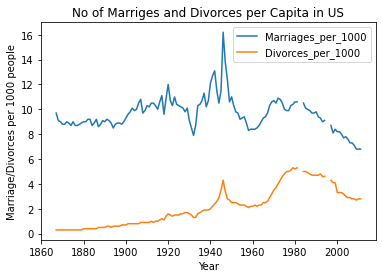

In [60]:
plt.plot(data['Year'], data['Marriages_per_1000'])
plt.plot(data['Year'], data['Divorces_per_1000'])
plt.title('No of Marriges and Divorces per Capita in US')
plt.xlabel('Year')
plt.ylabel('Marriage/Divorces per 1000 people')
plt.legend(['Marriages_per_1000','Divorces_per_1000'])

### Question 7

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [62]:
data = pd.read_csv('us-marriages-divorces-1867-2014.csv')
data.head()

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3


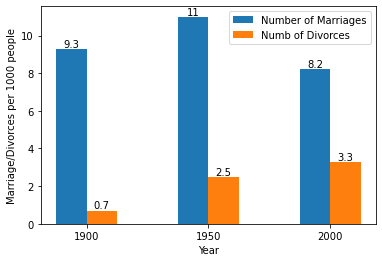

In [63]:
data_new = data.loc[data['Year'] == 1900]
data_new = data_new.append(data.loc[data['Year'] == 1950])
data_new = data_new.append(data.loc[data['Year'] == 2000])

fig, p = plt.subplots()
bar_width = 0.25
x = np.arange(3)

p1 = plt.bar(x, data_new['Marriages_per_1000'], bar_width, label="Number of Marriages")
p2 = plt.bar(x + bar_width, data_new['Divorces_per_1000'], bar_width, label="Numb of Divorces")

plt.xlabel('Year')
plt.ylabel('Marriage/Divorces per 1000 people')
plt.xticks(x + (bar_width/2) , ("1900", "1950", "2000"))
plt.legend()
plt.bar_label(p1)
plt.bar_label(p2)
plt.show()

### Question 8 

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

In [65]:
data = pd.read_csv("actor_kill_counts.csv")
data = data.sort_values(by=['Count'])
data.head()

,Actor,Count
9,Wesley Snipes,193
3,Clive Owen,194
5,Jet Li,201
6,Nicolas Cage,204
2,Clint Eastwood,207


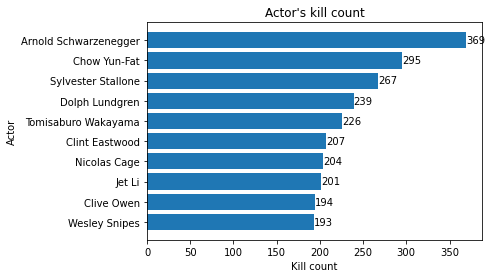

In [66]:
p = plt.barh(data['Actor'], data['Count'])
plt.ylabel("Actor")
plt.xlabel("Kill count")
plt.title("Actor's kill count")
plt.bar_label(p)
plt.show()

# Question 9

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

In [68]:
data = pd.read_csv('roman-emperor-reigns.csv')
data.head()

,Emperor,Length_of_Reign,Cause_of_Death
0,Augustus,40.58,Possibly assassinated
1,Tiberius,22.50,Possibly assassinated
2,Caligula,4.83,Assassinated
3,Claudius,13.75,Possibly assassinated
4,Nero,13.67,Suicide


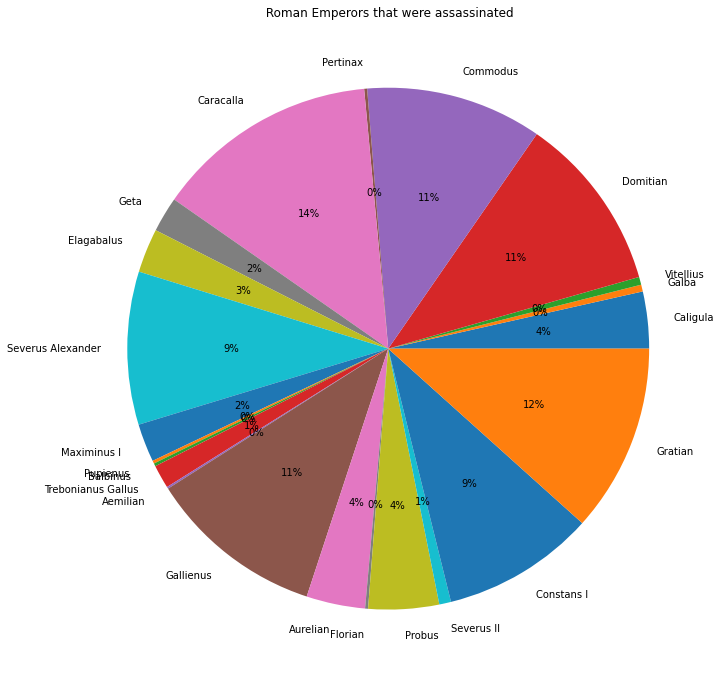

In [69]:
emp = data.loc[(data['Cause_of_Death']=='Assassinated')]
len_r = emp['Length_of_Reign']
emper = emp['Emperor']
fig = plt.figure(figsize=(12,12))
plt.pie(len_r,autopct="%.0f%%", labels=emper)
plt.title(' Roman Emperors that were assassinated')
plt.show()

# Question 10

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

In [71]:
data=pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')
data.head()

,Year,Total Arcade Revenue (billions),Computer Science Doctorates Awarded (US)
0,2000,1.196,861
1,2001,1.176,830
2,2002,1.269,809
3,2003,1.240,867
4,2004,1.307,948


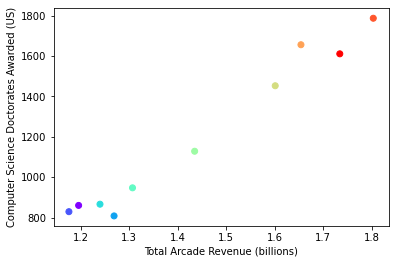

In [72]:
plt.scatter(x="Total Arcade Revenue (billions)",y="Computer Science Doctorates Awarded (US)",c=data.Year,cmap="rainbow",data=data)
plt.xlabel('Total Arcade Revenue (billions)')
plt.ylabel('Computer Science Doctorates Awarded (US)')
plt.show()